# Whitepaper - A stable coin
Can we create a set of tools that when used in tandem can stabilize the price of a token compared to a price index?  There are already solutions for doing so, Synthetex has tokens that track a large number of derivatives, DAI is also a good example of a stable coin pegged to the dollar. The issue with these are that they are capital inefficient, it requires over collateralized loans. The normal economy revolves around [fractional reserve banking](https://www.investopedia.com/terms/f/fractionalreservebanking.asp) where only a fraction of bank deposits are backed by actual funds. This allows for a faster growth rate since it frees up capital for other tasks. Can we find a general solution for creating tokens that track any price index, be it stocks, currencies or commodities without requiring over collateralization?

There are two good places to start.

* Protocols whom use game theory to increase the value of their ecosystem.
    * [OHM(3,3)](https://docs.olympusdao.finance/main/using-the-website/staking)
    * [Curve](https://resources.curve.fi/crv-token/understanding-crv)
    * [ve(3,3)](https://andrecronje.medium.com/ve-3-3-44466eaa088b)
* Central banks.

## Protocols
Understanding what OHM does with its bonds and staking is a good starting point. They have created a protocol that accrues value over time, could that value be tamed so that their value more closely tracks an index?

## Central banks
A good place to start when thinking about tracking an index is to look at central banks. Looking at the Swedish central bank we can see that their goal is to "maintain a fixed monetary value" more precisely the goal of the Swedish central bank is to keep inflation measured by a consumer price index (CPIF) around 2% per year.

Tools:
* Interest rates - Setting the rates of which banks and indirectly individuals can borrow to things like houses.
* Quantitative easing - They can buy up assets to prop up things like the stock market.
* Bonds - Selling bonds paying dividend as a way to prop up the value of the currency.

One thing that is often overlooked in regard to national currencies is taxes. Taxes is the way in which the state gets' money from its citizens. But the state controls the monetary supply they could just print the money it needs. Doing so would however collapse the currency due to hyperinflation. To prevent hyperinflation taxes are used, this requires citizen to keep the currency at hand to pay their taxes, while also making it possible for the government to insensitive different behaviours. There are however plenty of nations whom have survived without taxes relying instead on a trade surplus to keep the demand for the national currency in check.


## Method
How can we create a system $W_q$ that can keep a token $G_q$ pegged to a price index $Q$ within an inflation margin $I_q(t)$?

eq 1: $W_q \to G_q(t)\simeq I_q(t)Q(t)$

 There are several such system which require over collateralization the question is can it be created in a fractional manner? Creating such a system will require capital. However, it should have a couple of properties to reduce the capital need making the overall system more efficient. The capital required to mint $cost(nG_q)$ should be less than the market value $market(nG_q)$.

eq 2: $mint(nG_q)<M(nG_q)$

If the cost for minting is less than 

eq 2: $M(G_q) > Val(W_q)$

Such a system will be susceptible to attack. Depegging the system should impar significant cost to the attacker, which should be a deterrent to any rational agent.

eq 3: $cost(A_q) > sM(G_q)$ - An attack should cost more than the market cap times a safety margin $s$.

Looking at OHM we know that game theory can be used to create a system with the properties required by eq 2, 3. The question is can governance mechanics be places in the system to also achieve eq 1?

### Minting Wampum

Using bonds $G_q$ can be sold bellow market price.

### Pegging Wampum

### Securing Wampum

In [29]:
import pandas as pd

# Look here for how to get historic price information
# https://github.com/leosmigel/analyzingalpha/blob/master/2021-10-01-get-historical-crypto-price-data/2021-10-01-crypto-price-data.ipynb

cols = ['time', 'open', 'high', 'low', 'close', 'volume']
path = "./data"
dfs = pd.concat({"ethusd": pd.read_csv("./data/ethusd.csv", usecols=cols), "btcusd": pd.read_csv("./data/btcusd.csv", usecols=cols)})
#df["time"] = df["time"].astype("datetime64[ms]")
#df = df.set_index("time")

In [45]:
df = dfs.droplevel(1).reset_index().rename(columns={'index':'ticker'})
df = df[df['ticker'].str.contains('usd')]
df['date'] = pd.to_datetime(df['time'], unit='ms')
df = df.sort_values(by=['date','ticker'])
df = df.drop(columns='time')
df = df.set_index(['date'])
df = df['2020-07-01':'2020-12-31']
df

,ticker,open,close,high,low,volume
date,,,,,,
2020-07-01 00:00:00,btcusd,9150.646722,9147.300000,9150.646722,9147.300000,1.452704
2020-07-01 00:00:00,ethusd,225.880000,225.690000,225.880000,225.671073,12.266386
2020-07-01 00:01:00,btcusd,9147.217278,9138.000000,9147.217278,9138.000000,0.722777
2020-07-01 00:01:00,ethusd,225.676265,225.430000,225.676265,225.430000,21.111187
2020-07-01 00:02:00,btcusd,9138.000000,9115.900000,9138.000000,9115.100000,6.115542
...,...,...,...,...,...,...
2020-12-31 23:57:00,ethusd,736.500000,736.370000,736.500000,736.260000,0.419674
2020-12-31 23:58:00,btcusd,28968.000000,28920.000000,28968.000000,28920.000000,5.614837
2020-12-31 23:58:00,ethusd,736.492663,735.830000,736.750000,735.830000,2.254886


In [57]:
isEth = df["ticker"] == "ethusd"
isBtc = df["ticker"] == "btcusd"
btc = df[isBtc]["close"]
btc =  (btc - btc.min())/(btc.max() - btc.min())
eth = df[isEth]["close"]
eth = (eth - eth.min())/(eth.max()-eth.min())

In [58]:
%matplotlib widget
import matplotlib.pyplot as plt

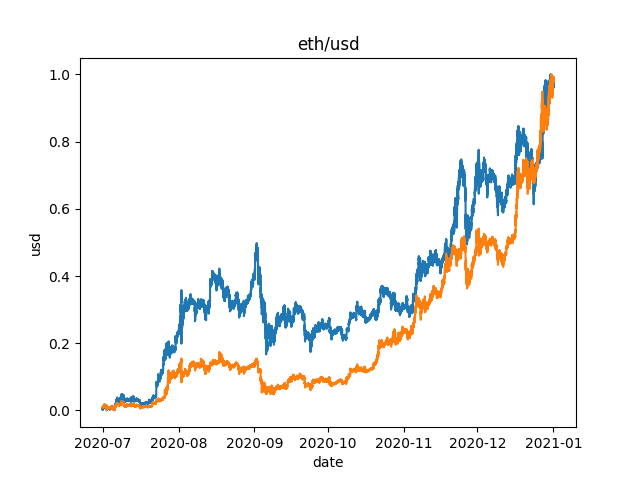

In [59]:
# Testing matplotlib interactions with a simple plot
plt.plot(eth)
plt.plot(btc)
plt.xlabel("date")
plt.ylabel("usd")
plt.title("eth/usd")
plt.show()